# Figsetup
Using chou 20210513 unsort data. <br>
shortcaption: A reconstructed kernel from SVD compared with the original kernel<br>
label: real_STK_SVD

In [1]:
filename = 'real_STK_SVD'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.io import loadmat
import pandas as pd
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["mathtext.fontset"] = "cm"

In [3]:
def NGD2L_TK_AS(T, epsilon, gamma, omegastar, deltastar, tau_y, Dmp):
    dt = np.mean(np.diff(T))
    dt = dt/50
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    Kw = -Dmp*( 1/np.cos(deltastar)*np.exp(-epsilon*T)*np.cos(T*omegastar+deltastar) -np.exp(-gamma*T) )
    w = np.convolve(x, Kw, 'full')[:len(T):50]*dt
    return w/(dt)

In [4]:
figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)
figmap = np.flipud(figmap)

# load files 

In [5]:
BS = loadmat('D:\\GoogleDrive\\retina\\oled_boundary_set', squeeze_me =True)

exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210513\\'
direction = 'UD'

SVDnSTK = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min_re\\unsort\\STK.mat'
                  , squeeze_me =True)
RFprop  = loadmat(exp_folder+'Analyzed_data\\30Hz_27_RF_15min_re\\unsort\\RF_properties.mat'
                  , squeeze_me =True)

loadfiles = np.load(exp_folder+'\\Analyzed_data\\fitNGD2LASpara.npz', allow_pickle=True)

In [6]:
r = RFprop['RF_properties']['radius']

RFprop = RFprop['RF_properties']

STK = SVDnSTK['gauss_RF']

# cn = 9

# on MEA

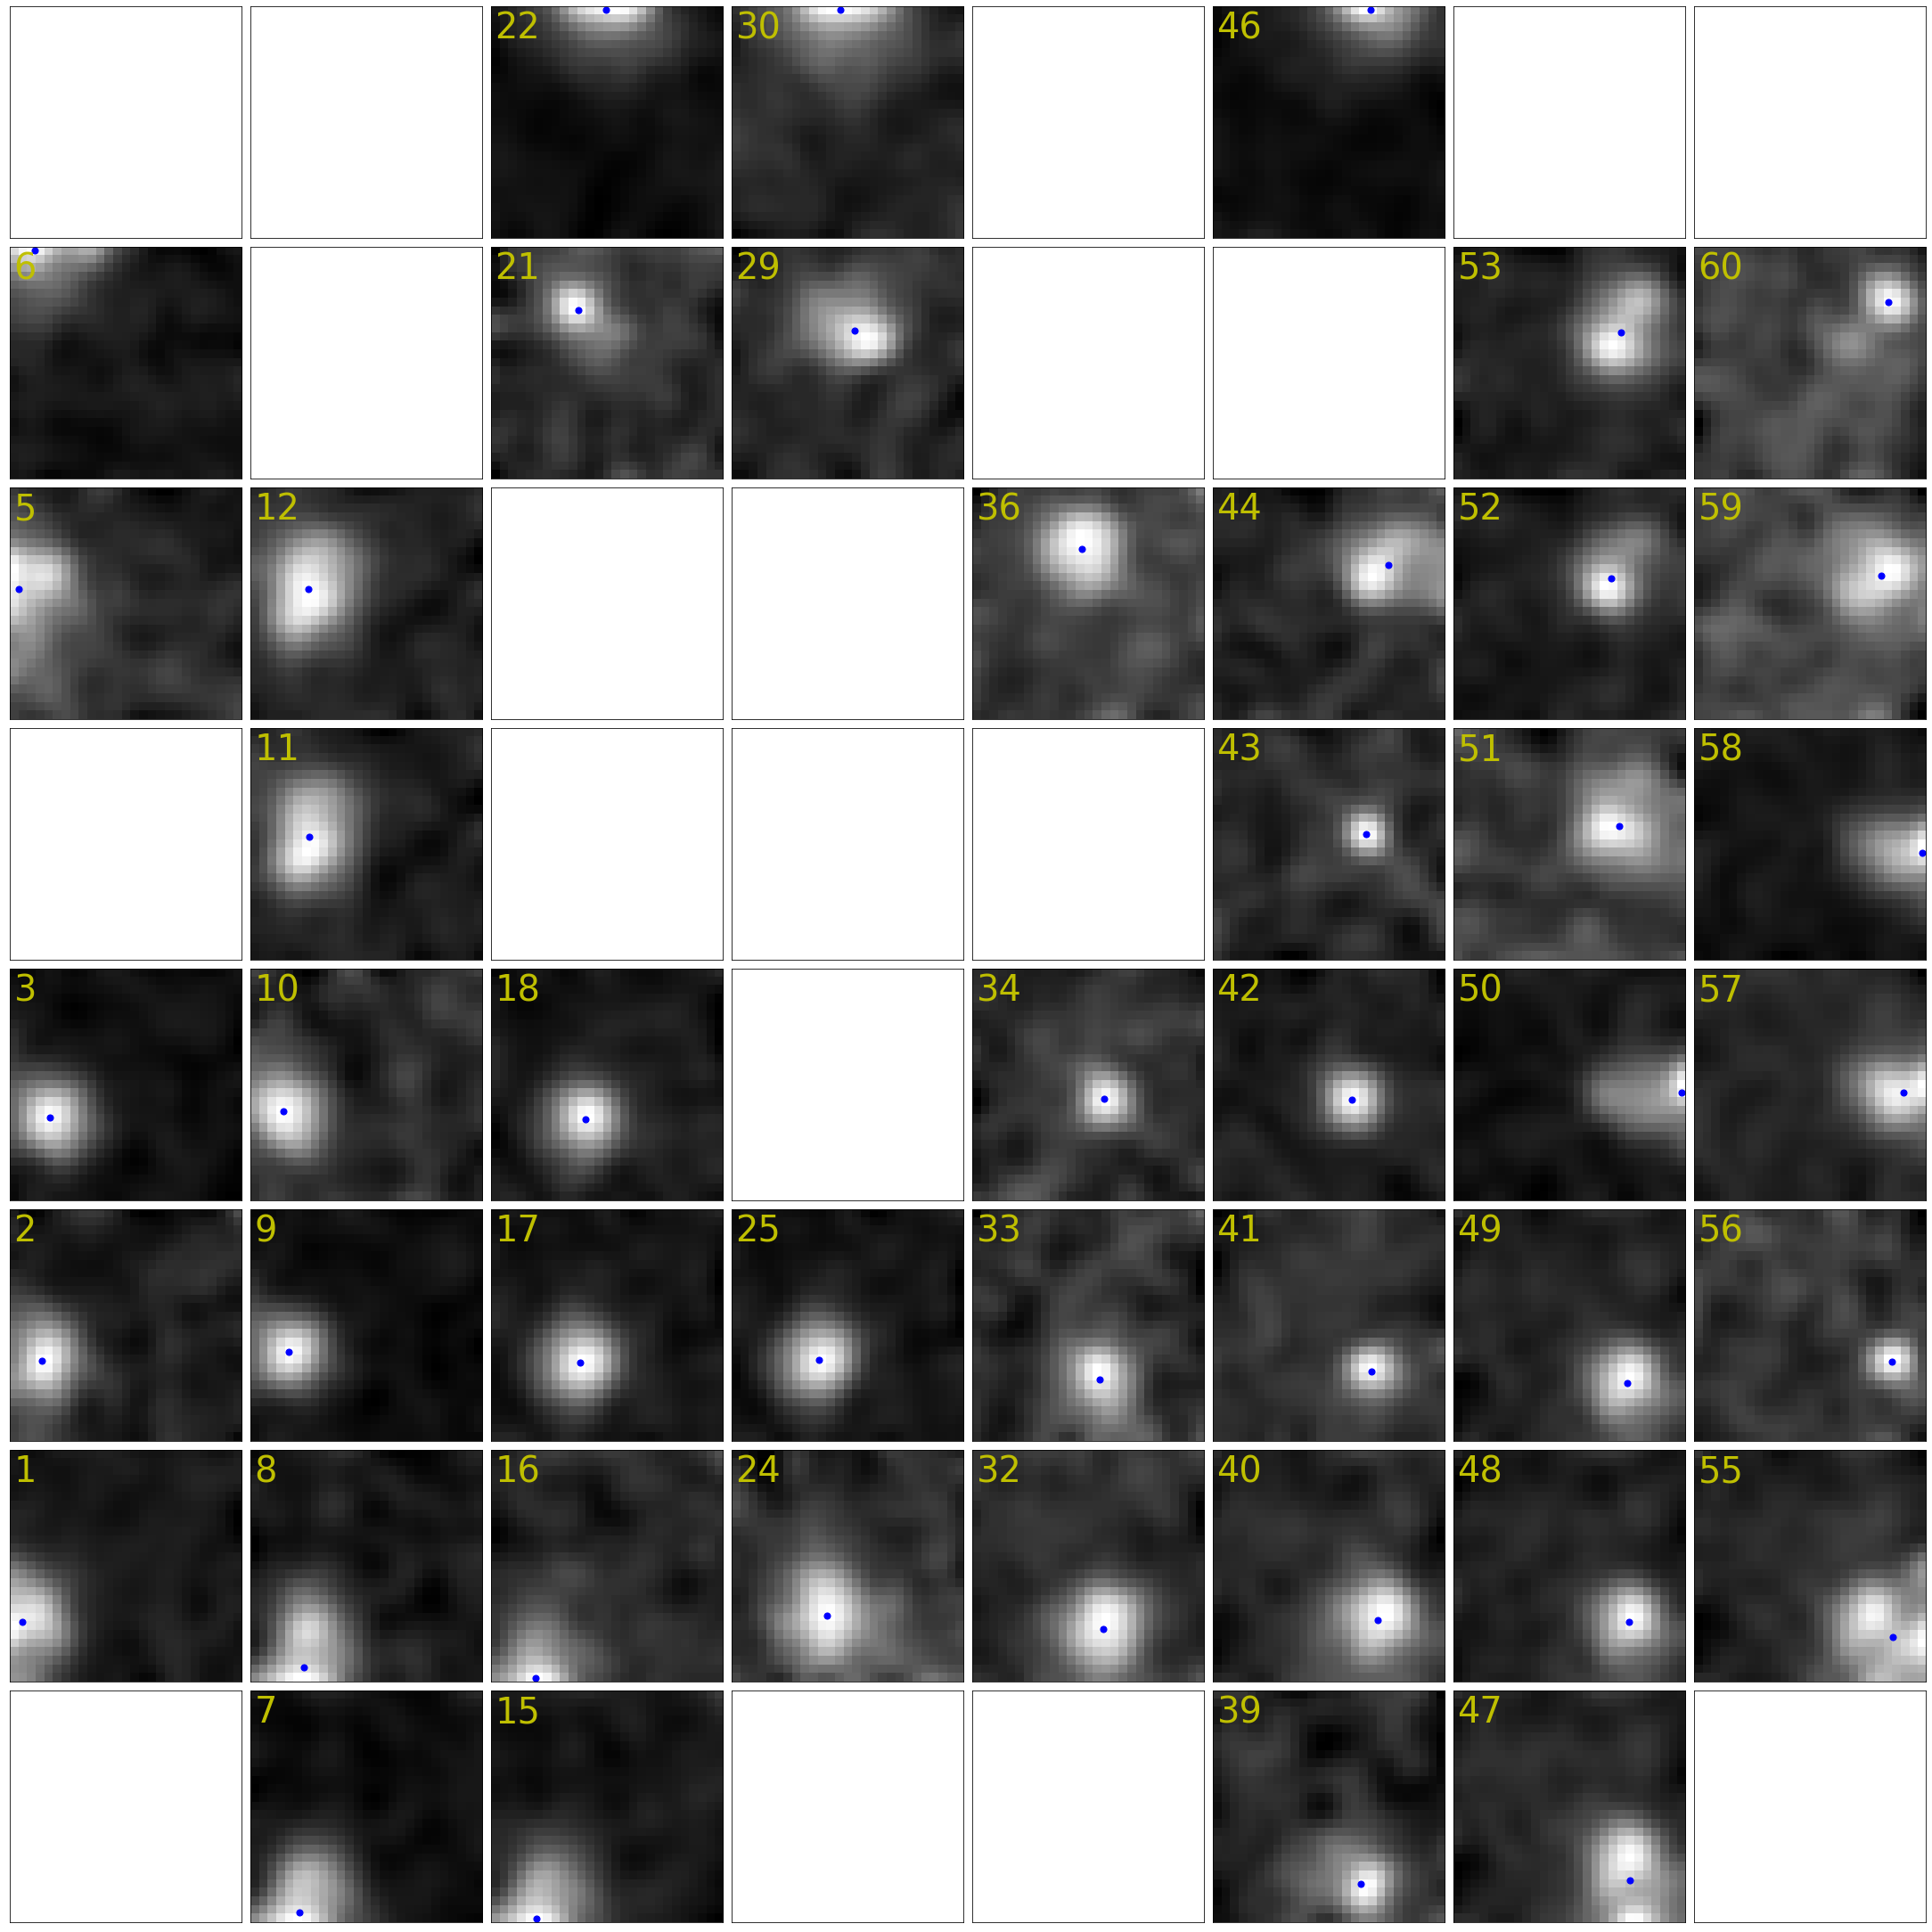

In [7]:
fig, ax = plt.subplots(nrows=8, ncols=8, constrained_layout=True, sharex=True, sharey=True)
fig.set_size_inches(30, 30)
for cn in range(60):
    if cn+1 in [28,31]: continue
    try:
        len(RFprop[cn][0])
    except:
        rSTK = STK[:,:,:,cn].reshape((STK.shape[0],-1))
        U,sigma,VT=np.linalg.svd(rSTK)
        if U[3,0]>0:
            U[:,0] = -U[:,0]
            VT[0,:] = -VT[0,:]
        ax[np.where(figmap == cn+1)][0].imshow( VT[0,:].reshape((27,27)) , cmap='gray')
        # plt.title(r'$\left\langle {v_1} \right|$', fontsize=20)
        centerx = (RFprop['X_Coor'][cn]-BS['leftx_bd'])/(BS['rightx_bd']-BS['leftx_bd'])*27-0.5
        centery = (RFprop['Y_Coor'][cn]-BS['lefty_bd'])/(BS['righty_bd']-BS['lefty_bd'])*27-0.5
        ax[np.where(figmap == cn+1)][0].scatter(centerx,centery, c = 'b', s = 50)
        ax[np.where(figmap == cn+1)][0].text(0, 0, str(cn+1), va = 'top',fontsize = 40, color = 'y')
        
for a in ax.flatten():        
    a.axes.xaxis.set_visible(False)
    a.axes.yaxis.set_visible(False)
    # plt.gcf().set_size_inches(3,3.5)

In [8]:
# fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\RF_MEA.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

# Single RF

In [9]:
cn = 9

In [10]:
centerx = (RFprop['X_Coor'][cn-1]-BS['leftx_bd'])/(BS['rightx_bd']-BS['leftx_bd'])*27-0.5
centery = (RFprop['Y_Coor'][cn-1]-BS['lefty_bd'])/(BS['righty_bd']-BS['lefty_bd'])*27-0.5

## SVD

In [11]:
rSTK = STK[:,:,:,cn-1].reshape((STK.shape[0],-1))
U,sigma,VT=np.linalg.svd(rSTK)

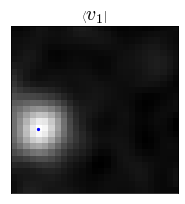

In [12]:
plt.imshow( VT[0,:].reshape((27,27)) , cmap='gray')
plt.title(r'$\left\langle {v_1} \right|$', fontsize=20)
plt.scatter(centerx,centery, c = 'b', s = 5)
plt.gca().axes.xaxis.set_visible(False)
plt.gca().axes.yaxis.set_visible(False)
plt.gcf().set_size_inches(3,3.5)
# plt.gcf().savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\v1.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

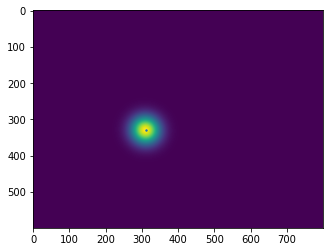

In [13]:
def Gaussian_filter_2d_Rot(x, y, x0, y0, xs, ys, angle, A):
    cx = x[np.newaxis,:]*np.ones_like(y)[:,np.newaxis]  -x0
    cy = np.ones_like(x)[np.newaxis,:]*y[:,np.newaxis]-y0
    rx =  cx*np.cos(angle) - cy*np.sin(angle) 
    ry =  cx*np.sin(angle) + cy*np.cos(angle)
    return A*(np.exp(-((rx/xs)**2+(ry/ys)**2)/2)),  x-x0, y-y0

micro_per_pixel = BS['micro_per_pixel']
RFellipse, xaxis, yaxis = Gaussian_filter_2d_Rot(
                                np.arange(1,801), np.arange(1,601), RFprop[cn-1]['X_Coor'], RFprop[cn-1]['Y_Coor'], 
                                RFprop[cn-1]['X_Width']/1.5/micro_per_pixel, RFprop[cn-1]['Y_Width']/1.5/micro_per_pixel,
                                RFprop[cn-1]['Angle'], RFprop[cn-1]['Amplitude'])

plt.imshow(RFellipse)
plt.scatter(RFprop[cn-1]['X_Coor']-1, RFprop[cn-1]['Y_Coor']-1, s=2)

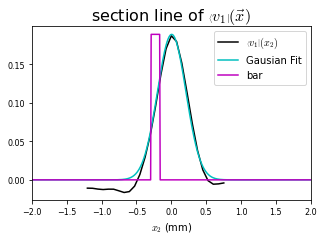

In [14]:
plt.rcParams["font.size"] = 10
plt.rcParams['xtick.labelsize'] =  8
plt.rcParams['ytick.labelsize'] =  8

fig, a = plt.subplots()

xaxis = (np.arange(27)-16)/27*267*micro_per_pixel*0.001
a.plot(xaxis, VT[0,:].reshape((27,27))[:, 4], 'k', label=r'$\left\langle {v_1} \right|(x_2)$')
xaxis = (np.arange(600)-int(RFprop[cn-1]['Y_Coor']-1))*micro_per_pixel*0.001 #mm center at RF peak
a.plot(xaxis, RFellipse[:, int(RFprop[cn-1]['X_Coor']-1)], 'c', label='Gausian Fit')
bar = np.zeros_like(xaxis)
bar[ 300-BS['bar_wid']-1 : 300+BS['bar_wid'] ] = np.max(RFellipse)
a.plot(xaxis, bar, 'm', label='bar')
#     ax[1].plot(SKxaxis, iSK/np.max(iSK), 'r',label=r'$K_s(x)$')
#     ax[1].plot(SKxaxis, VT[0,:]/np.max(VT[0,:]), 'k',label=r'$\left\langle {v_1} \right|(x)$')
#     ax[1].plot(SKxaxis, delSTK[np.where(delSTK == np.max(delSTK))[0][0], :]/np.max(delSTK), 'g--',label=r'$K_{st}(\arg\min_{t} K_{st}, x)$')
a.legend(loc='best')
# a.set_ylabel('normalized SK')
a.set_title(r'section line of $\left\langle {v_1} \right|(\vec x)$', fontsize=16)
a.set_xlabel(r'$x_2$ (mm)')
a.set_xlim([-2,2])
fig.set_size_inches(5,3.2)

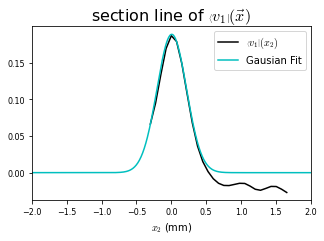

In [18]:
plt.rcParams["font.size"] = 10
plt.rcParams['xtick.labelsize'] =  8
plt.rcParams['ytick.labelsize'] =  8

fig, a = plt.subplots()

xaxis = (np.arange(27)-4)/27*267*micro_per_pixel*0.001
a.plot(xaxis, VT[0,:].reshape((27,27))[16, :], 'k', label=r'$\left\langle {v_1} \right|(x_2)$')
xaxis = (np.arange(800)-int(RFprop[cn-1]['X_Coor']-1))*micro_per_pixel*0.001 #mm center at RF peak
a.plot(xaxis, RFellipse[int(RFprop[cn-1]['Y_Coor']-1),:], 'c', label='Gausian Fit')

a.legend(loc='best')
a.set_title(r'section line of $\left\langle {v_1} \right|(\vec x)$', fontsize=16)
a.set_xlabel(r'$x_2$ (mm)')
a.set_xlim([-2,2])
fig.set_size_inches(5,3.2)

In [15]:
# fig.savefig('D:\\GoogleDrive\\retina\\thesis\\fig\\R\\RF_section.png',  bbox_inches='tight', pad_inches=0.1, dpi=300)

In [16]:
int(300-RFprop[cn-1]['Y_Coor'])-BS['bar_wid']

-38

In [17]:
300-BS['bar_wid']-1

291